# CIS 164 Final Project

** Question: ** We are going to see if there is a difference between pitching and hitting and which contributes more to winning if at all. 
** Data Set: ** We have a compiled data set from 'Baseball Reference'. We want to determine if there is a difference between pitching and hitting and see which has a greater effect on winning from since the 2000 season. 



In [16]:
%pip install --upgrade pip
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install statsmodels
%pip install jinja2
import pandas as pd
import jinja2 as j2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


# Loading the Data in
Loading in both data sets from excel as a csv. Data is from https://stathead.com/stathead/ with hitting and pitching metrics from 2000 to 2025. Included in this section is the merge of data sets to make working with the data easier. 

In [17]:
#Loading in my offensive data from MLB hitters. Data from https://stathead.com/stathead/
import pandas as pd
pd.__version__

df_h = pd.read_csv("hitdata.updated.csv")
df_h.info()
df_h.head(5)
df_h.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      780 non-null    int64  
 1   Season  780 non-null    int64  
 2   Team    780 non-null    object 
 3   Lg      780 non-null    object 
 4   GP      780 non-null    int64  
 5   W       780 non-null    int64  
 6   L       780 non-null    int64  
 7   WL%     780 non-null    float64
 8   Bat#    780 non-null    int64  
 9   PA      780 non-null    int64  
 10  AB      780 non-null    int64  
 11  R       780 non-null    int64  
 12  H       780 non-null    int64  
 13  1B      780 non-null    int64  
 14  2B      780 non-null    int64  
 15  3B      780 non-null    int64  
 16  HR      780 non-null    int64  
 17  RBI     780 non-null    int64  
 18  SB      780 non-null    int64  
 19  CS      780 non-null    int64  
 20  BB      780 non-null    int64  
 21  SO      780 non-null    int64  
 22  BA

,Rk,Season,GP,W,L,WL%,Bat#,PA,AB,R,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,LOB,R/Gm
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,390.500000,2012.500000,158.035897,79.010256,79.010256,0.499991,39.807692,6033.760256,5384.762821,719.180769,...,0.738227,97.391026,2228.362821,118.838462,58.057692,39.852564,42.024359,33.512821,1096.185897,4.552436
std,225.310896,7.504812,19.648745,15.413260,15.399595,0.075156,9.006712,773.292798,689.090835,119.510907,...,0.039725,8.710560,327.863971,22.675521,16.076774,23.550510,10.181318,16.636755,151.497243,0.507941
min,1.000000,2000.000000,58.000000,19.000000,17.000000,0.253000,17.000000,2011.000000,1752.000000,219.000000,...,0.618000,73.000000,650.000000,28.000000,10.000000,0.000000,7.000000,1.000000,337.000000,3.100000
25%,195.750000,2006.000000,162.000000,71.000000,71.000000,0.444000,35.000000,6089.000000,5458.000000,673.000000,...,0.708750,91.000000,2148.500000,109.000000,48.000000,20.000000,36.000000,21.000000,1076.750000,4.200000
50%,390.500000,2012.500000,162.000000,81.000000,79.000000,0.506000,40.000000,6176.500000,5515.000000,729.000000,...,0.738000,97.000000,2274.000000,121.000000,56.000000,37.000000,42.000000,33.000000,1120.000000,4.500000
75%,585.250000,2019.000000,162.000000,90.000000,89.000000,0.556000,46.000000,6264.250000,5572.000000,787.000000,...,0.764000,103.000000,2389.750000,133.000000,67.000000,58.000000,48.250000,44.000000,1161.000000,4.900000
max,780.000000,2025.000000,163.000000,116.000000,121.000000,0.717000,69.000000,6537.000000,5770.000000,978.000000,...,0.851000,126.000000,2832.000000,170.000000,116.000000,119.000000,75.000000,153.000000,1301.000000,6.000000


In [18]:
# Loading in my pitching data from MLB pitchers. Data from https://stathead.com/stathead/
df_p = pd.read_csv("pitchdata.updated.csv")
df_p.info()
df_p.head(5)
df_p.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      780 non-null    int64  
 1   Season  780 non-null    int64  
 2   Team    780 non-null    object 
 3   Lg      780 non-null    object 
 4   GP      780 non-null    int64  
 5   W       780 non-null    int64  
 6   L       780 non-null    int64  
 7   WL%     780 non-null    float64
 8   ERA     780 non-null    float64
 9   G       780 non-null    int64  
 10  CG      780 non-null    int64  
 11  SHO     780 non-null    int64  
 12  SV      780 non-null    int64  
 13  IP      780 non-null    float64
 14  H       780 non-null    int64  
 15  R       780 non-null    int64  
 16  ER      780 non-null    int64  
 17  HR      780 non-null    int64  
 18  BB      780 non-null    int64  
 19  IBB     780 non-null    int64  
 20  SO      780 non-null    int64  
 21  HBP     780 non-null    int64  
 22  BK

,Rk,Season,GP,W,L,WL%,ERA,G,CG,SHO,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/BB
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,390.500000,2012.500000,158.035897,79.010256,79.010256,0.499991,4.245769,158.035897,3.829487,1.603846,...,52.561538,6033.755128,101.814103,4.244885,1.341917,8.821282,1.108333,3.256282,7.587436,2.376526
std,225.310896,7.504812,19.648745,15.413260,15.399595,0.075156,0.548027,19.648745,3.321908,1.539630,...,14.413749,773.856224,11.016270,0.424915,0.099929,0.663370,0.192530,0.419271,1.105835,0.501673
min,1.000000,2000.000000,58.000000,19.000000,17.000000,0.253000,2.800000,58.000000,0.000000,0.000000,...,11.000000,1989.000000,77.000000,3.170000,1.048000,6.900000,0.600000,2.100000,4.800000,1.280000
25%,195.750000,2006.000000,162.000000,71.000000,71.000000,0.444000,3.857500,162.000000,1.000000,0.000000,...,43.000000,6082.750000,94.000000,3.940000,1.268000,8.400000,1.000000,3.000000,6.700000,2.027500
50%,390.500000,2012.500000,162.000000,81.000000,79.000000,0.506000,4.200000,162.000000,3.000000,1.000000,...,52.000000,6176.500000,101.000000,4.220000,1.337500,8.800000,1.100000,3.200000,7.600000,2.320000
75%,585.250000,2019.000000,162.000000,90.000000,89.000000,0.556000,4.622500,162.000000,6.000000,2.000000,...,61.000000,6270.000000,109.000000,4.530000,1.413000,9.300000,1.200000,3.500000,8.500000,2.700000
max,780.000000,2025.000000,163.000000,116.000000,121.000000,0.717000,5.990000,163.000000,18.000000,8.000000,...,98.000000,6559.000000,146.000000,5.570000,1.640000,10.700000,1.900000,4.500000,11.000000,3.980000


In [19]:
#Merged the data set to have only one data frame to work with. Merged on "Rk" which is the team rank number which is unique for every team through every season.
merged = pd.merge(df_h, df_p, on="Rk", how="inner", suffixes=("_df","fld"))
merged.head(50)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 67 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         780 non-null    int64  
 1   Season_df  780 non-null    int64  
 2   Team_df    780 non-null    object 
 3   Lg_df      780 non-null    object 
 4   GP_df      780 non-null    int64  
 5   W_df       780 non-null    int64  
 6   L_df       780 non-null    int64  
 7   WL%_df     780 non-null    float64
 8   Bat#       780 non-null    int64  
 9   PA         780 non-null    int64  
 10  AB         780 non-null    int64  
 11  R_df       780 non-null    int64  
 12  H_df       780 non-null    int64  
 13  1B         780 non-null    int64  
 14  2B         780 non-null    int64  
 15  3B         780 non-null    int64  
 16  HR_df      780 non-null    int64  
 17  RBI        780 non-null    int64  
 18  SB         780 non-null    int64  
 19  CS         780 non-null    int64  
 20  BB_df     

In [20]:
#Data cleaning, removing any "?" or "0" values and replacing them with pd.NA for better handling of missing data. I do not believe there was any missing data but better to be safe.
for merged in ():
    merged.replace({"?": pd.NA,"0": pd.NA,"0": pd.NA,"0": pd.NA}, inplace=True) 

In [21]:
#When merging, it gave me two WL% columns, one from each data set. I only need one so I am dropping the extra one from the pitching data set.
X = merged.drop("WL%_df", axis=1)
y = merged["WL%_df"]


# Exploratory Analysis
Not all included in my presentation, but exploratory analysis to get familar with the data and see what 'traditional' average values are for key metrics.

In [22]:
# 5-number summary statistics for key offensive and pitching statistics. Big picture stats such as OPS and ERA
ops_np = merged["OPS"].to_numpy()
ops_mean = np.mean(ops_np)
print(ops_mean)
ops_median = np.median(ops_np)
print(ops_median)
ops_std = np.std(ops_np)
print(ops_std)

era_np = merged["ERA"].to_numpy()
era_mean = np.mean(era_np)
print(era_mean)
era_median = np.median(era_np)
print(era_median)
era_std = np.std(era_np)
print(era_std)




0.7382269230769231
0.738
0.03969910601937622
4.2457692307692305
4.2
0.5476753184486862


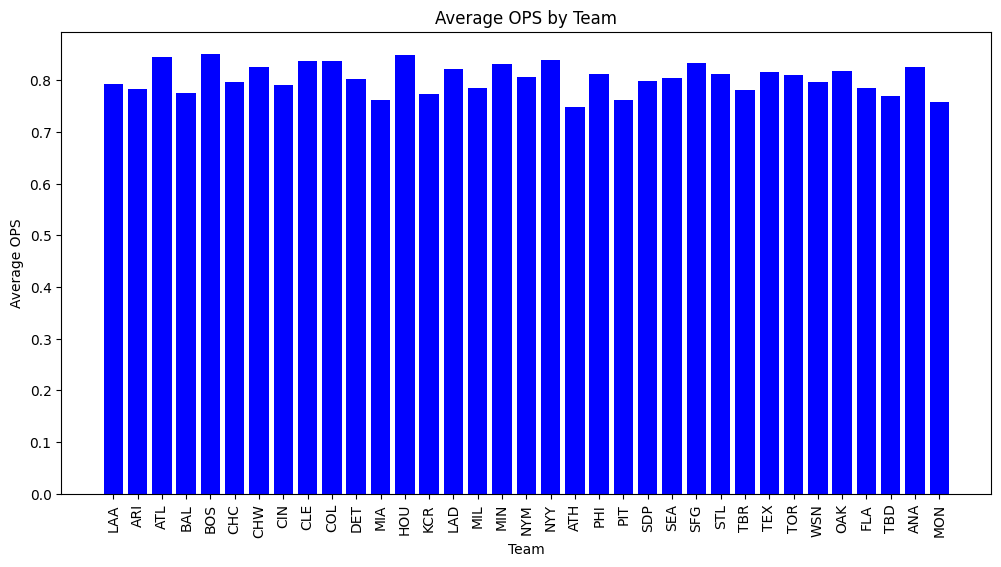

In [70]:
#Average OPS by team visualization
Teamo = merged.groupby(['Rk', 'Team_df'])['OPS'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.bar(Teamo['Team_df'], Teamo['OPS'], color='blue')
plt.xlabel('Team')
plt.ylabel('Average OPS')
plt.title('Average OPS by Team')
plt.xticks(rotation=90) 
plt.show()


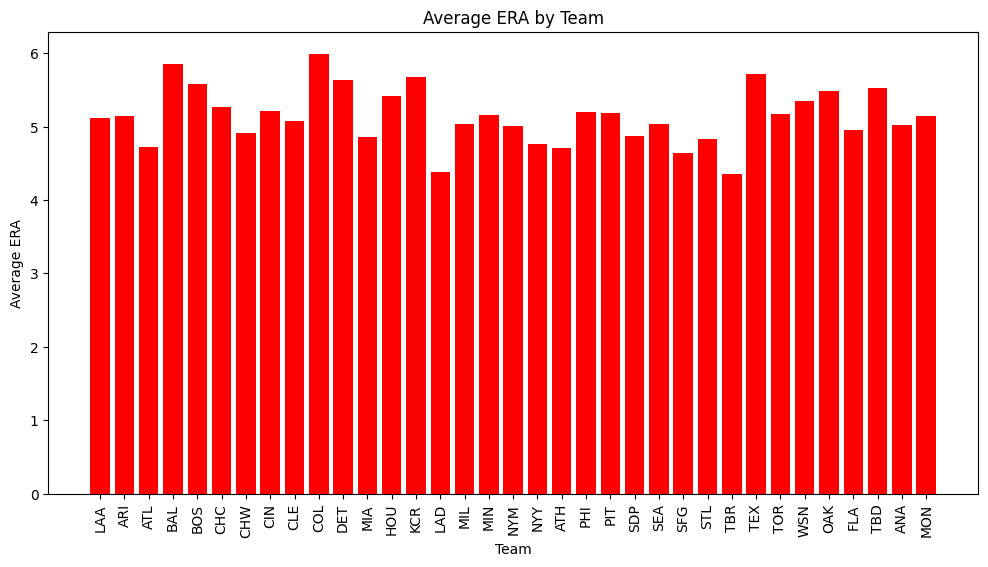

In [69]:
#Average ERA by team visualization
Teame = merged.groupby(['Rk', 'Team_df'])['ERA'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.bar(Teame['Team_df'], Teame['ERA'], color='red')
plt.xlabel('Team')
plt.ylabel('Average ERA')
plt.title('Average ERA by Team')
plt.xticks(rotation=90) 
plt.show()

In [25]:
#Same data as before with the average of OPS and ERA but now being grouped with WL% by team.
league = merged.groupby(['Team_df'])[['OPS', 'ERA', 'WL%_df']].mean().reset_index()
league.head(40)

,Team_df,OPS,ERA,WL%_df
0,ANA,0.768600,4.294000,0.524600
1,ARI,0.737808,4.318462,0.485462
2,ATH,0.749000,4.710000,0.469000
3,ATL,0.749962,3.915000,0.543615
4,BAL,0.734577,4.667692,0.456577
5,BOS,0.778192,4.260769,0.540115
6,CHC,0.737885,4.067308,0.503346
7,CHW,0.735538,4.330000,0.482038
8,CIN,0.733231,4.414615,0.474077
9,CLE,0.742077,4.097308,0.521231


# Visualizations of WL%
Looking at these metrics in comparison with WL%

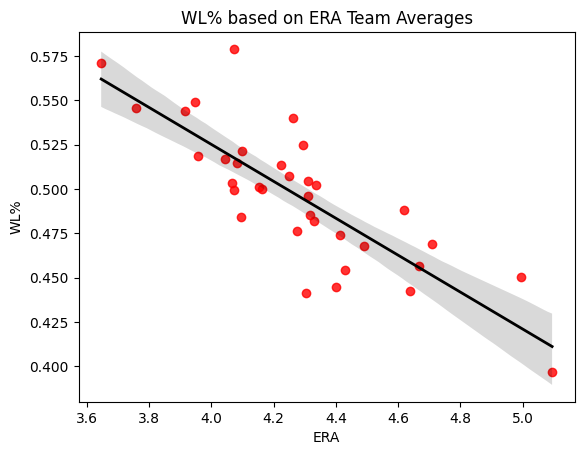

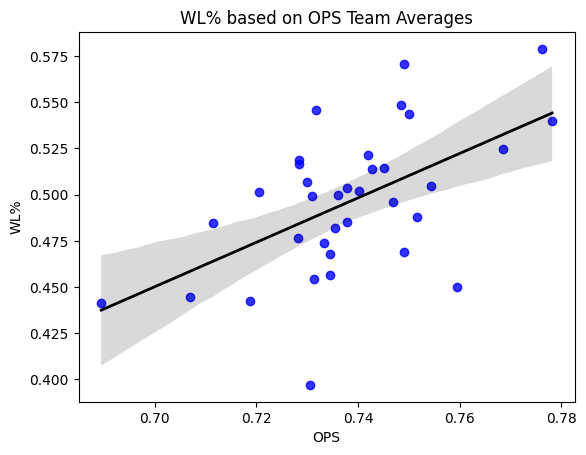

In [26]:
# Visualizations showing relationship between WL% and OPS/ERA for team averages
sns.regplot(x='ERA', y='WL%_df', data=league, color='red', line_kws={'color':'black', 'linewidth':2})
plt.xlabel('ERA')
plt.ylabel('WL%')
plt.title('WL% based on ERA Team Averages')
plt.show()

sns.regplot(x='OPS', y='WL%_df', data=league, color='blue', line_kws={'color':'black', 'linewidth':2})
plt.xlabel('OPS')
plt.ylabel('WL%')
plt.title('WL% based on OPS Team Averages')
plt.show()


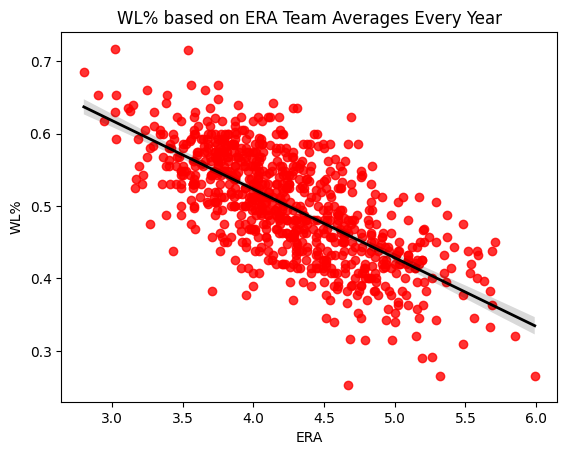

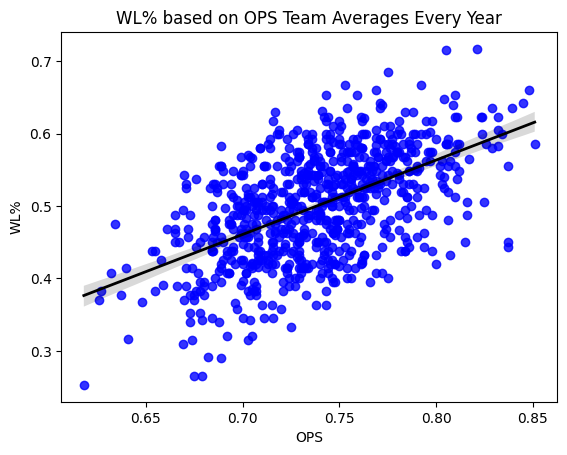

In [27]:
#Every team from every year visualized with OPS/ERA for WL%
sns.regplot(x='ERA', y='WL%_df', data=merged, color='red', line_kws={'color':'black', 'linewidth':2})
plt.xlabel('ERA')
plt.ylabel('WL%')
plt.title('WL% based on ERA Team Averages Every Year')
plt.show()

sns.regplot(x='OPS', y='WL%_df', data=merged, color='blue', line_kws={'color':'black', 'linewidth':2})
plt.xlabel('OPS')
plt.ylabel('WL%')
plt.title('WL% based on OPS Team Averages Every Year')
plt.show()

# Start of Model Building and Analysis
Building both the hitting and pitching models. Evaluating correlations, significance and multicollinearity. 

In [ ]:
#Heatmap of correlations between key offensive stats and WL%. This includes all offensive stats in our dataset without H, 2B, 3B, R, RBI as they can shown with proportion statistics such as BA, etc.
#Heatmap method from seaborn document https://seaborn.pydata.org/generated/seaborn.heatmap.html
correlation_table_o=merged[['WL%_df','OPS+','HR_df', 'SB', 'BA', 'OBP', 'SLG', 'SO_df', 'LOB', 'OPS']].corr()
correlation_table_o.style.background_gradient(cmap='coolwarm')

,WL%_df,OPS+,HR_df,SB,BA,OBP,SLG,SO_df,LOB,OPS
WL%_df,1.000000,0.642567,0.370385,0.042064,0.336798,0.520435,0.509196,-0.096025,0.114021,0.543148
OPS+,0.642567,1.000000,0.483015,-0.015632,0.473624,0.615813,0.712918,-0.077319,0.072917,0.718446
HR_df,0.370385,0.483015,1.000000,0.067113,0.198824,0.318438,0.672003,0.488375,0.424603,0.580017
SB,0.042064,-0.015632,0.067113,1.000000,0.073219,0.014459,-0.087874,0.190579,0.312412,-0.054503
BA,0.336798,0.473624,0.198824,0.073219,1.000000,0.837503,0.684851,-0.407184,0.367106,0.781433
OBP,0.520435,0.615813,0.318438,0.014459,0.837503,1.000000,0.765102,-0.363606,0.324382,0.896846
SLG,0.509196,0.712918,0.672003,-0.087874,0.684851,0.765102,1.000000,-0.156767,0.101927,0.970892
SO_df,-0.096025,-0.077319,0.488375,0.190579,-0.407184,-0.363606,-0.156767,1.000000,0.439231,-0.242870
LOB,0.114021,0.072917,0.424603,0.312412,0.367106,0.324382,0.101927,0.439231,1.000000,0.190793
OPS,0.543148,0.718446,0.580017,-0.054503,0.781433,0.896846,0.970892,-0.242870,0.190793,1.000000


In [ ]:
# Build models to best predict WL% based offensive and pitching stats. Two seperate models. Backwards regression to get the best predictors. 
#OLS model method from GeeksforGeeks https://www.geeksforgeeks.org/ordinary-least-squares-ols-regression-in-python-using-statsmodels/?utm_source=chatgpt.com

#model one, offense
X_offense = merged[['OPS+','HR_df', 'SB', 'BA', 'OBP', 'SLG', 'SO_df', 'LOB', 'OPS']]
y_offense = merged['WL%_df']
X_offense = sm.add_constant(X_offense)
model_offense = sm.OLS(y_offense, X_offense).fit()
print(model_offense.summary())


                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     76.93
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          4.08e-101
Time:                        19:48:33   Log-Likelihood:                 1162.7
No. Observations:                 780   AIC:                            -2305.
Df Residuals:                     770   BIC:                            -2259.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0818      0.073     -1.128      0.2

In [30]:
# Removed OPS due to high p-value
X_offense1 = merged[['OPS+', 'OBP', 'HR_df', 'SB', 'BA', 'SO_df', 'SLG', 'LOB']]
y_offense = merged['WL%_df']
X_offense1 = sm.add_constant(X_offense1)
model_offense1 = sm.OLS(y_offense, X_offense1).fit()
print(model_offense1.summary())


                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     86.66
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          4.24e-102
Time:                        19:48:33   Log-Likelihood:                 1162.7
No. Observations:                 780   AIC:                            -2307.
Df Residuals:                     771   BIC:                            -2265.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0819      0.072     -1.133      0.2

In [31]:
#Removed LOB due to high p-value. Ends up becomming the best model for offense.
X_offense2 = merged[['OPS+', 'OBP', 'HR_df', 'SB', 'BA', 'SO_df', 'SLG']]
y_offense = merged['WL%_df']
X_offense2 = sm.add_constant(X_offense2)
model_offense2 = sm.OLS(y_offense, X_offense2).fit()
print(model_offense2.summary())


                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     99.16
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          4.15e-103
Time:                        19:48:33   Log-Likelihood:                 1162.7
No. Observations:                 780   AIC:                            -2309.
Df Residuals:                     772   BIC:                            -2272.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0782      0.068     -1.152      0.2

In [ ]:
# Checking for multicollinearity with VIF. Method from GeeksfoGeeks https://www.geeksforgeeks.org/python/detecting-multicollinearity-with-vif-python/
vif_data = pd.DataFrame()
vif_data["feature"] = X_offense2.columns
vif_data["VIF"] = [variance_inflation_factor(X_offense2.values, i) for i in range(X_offense2.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
  feature          VIF
0   const  1197.997628
1    OPS+     2.184188
2     OBP     4.757304
3   HR_df     5.922305
4      SB     1.165527
5      BA     4.097499
6   SO_df     3.085521
7     SLG     8.721040


In [33]:
#Removed SLG due to high VIF score which shows multicollinearity. FInal model without multicollinearity issues is shown. 
X_offense3 = merged[['OPS+', 'OBP', 'HR_df', 'SB', 'BA', 'SO_df']]
y_offense = merged['WL%_df']
X_offense3 = sm.add_constant(X_offense3)
model_offense3 = sm.OLS(y_offense, X_offense3).fit()

vif_data = pd.DataFrame()
vif_data["feature"] = X_offense3.columns
vif_data["VIF"] = [variance_inflation_factor(X_offense3.values, i) for i in range(X_offense3.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
  feature          VIF
0   const  1021.995981
1    OPS+     1.917064
2     OBP     4.551376
3   HR_df     2.401464
4      SB     1.089095
5      BA     3.600566
6   SO_df     2.388885


In [34]:
#Test one more time for p-value as we have removed slugging. All looks good so the model is complete.
print(model_offense3.summary())

                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     113.9
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          8.32e-103
Time:                        19:48:33   Log-Likelihood:                 1159.5
No. Observations:                 780   AIC:                            -2305.
Df Residuals:                     773   BIC:                            -2272.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1435      0.063     -2.280      0.0

In [35]:
#Heatmap of correlations between key pitching stats and WL%. This includes all pitching stats in our dataset without individual counting stats such as W, L, IP, etc. as they can be shown in proportion stats.
correlation_table_p=merged[['WL%_df',"ERA", "WHIP", "SO9", "BB9", "H9", "HR9", "CG", "SV", "ERA+"]].corr()
correlation_table_p.style.background_gradient(cmap='coolwarm')

,WL%_df,ERA,WHIP,SO9,BB9,H9,HR9,CG,SV,ERA+
WL%_df,1.000000,-0.690769,-0.652754,0.263768,-0.500902,-0.570750,-0.394033,0.124696,0.532108,0.762323
ERA,-0.690769,1.000000,0.890609,-0.373565,0.622595,0.814913,0.649059,-0.062752,-0.485260,-0.793839
WHIP,-0.652754,0.890609,1.000000,-0.585590,0.722173,0.899266,0.371561,0.074619,-0.373978,-0.723291
SO9,0.263768,-0.373565,-0.585590,1.000000,-0.174701,-0.680771,0.153458,-0.463605,-0.015309,0.319821
BB9,-0.500902,0.622595,0.722173,-0.174701,1.000000,0.349783,0.332908,-0.117343,-0.408134,-0.486636
H9,-0.570750,0.814913,0.899266,-0.680771,0.349783,1.000000,0.294410,0.174078,-0.254960,-0.673815
HR9,-0.394033,0.649059,0.371561,0.153458,0.332908,0.294410,1.000000,-0.265929,-0.413681,-0.430564
CG,0.124696,-0.062752,0.074619,-0.463605,-0.117343,0.174078,-0.265929,1.000000,0.059393,0.144182
SV,0.532108,-0.485260,-0.373978,-0.015309,-0.408134,-0.254960,-0.413681,0.059393,1.000000,0.390662
ERA+,0.762323,-0.793839,-0.723291,0.319821,-0.486636,-0.673815,-0.430564,0.144182,0.390662,1.000000


In [53]:
#Original pitching model with all variables, starting backwards regression from here.
X_pitching = merged[["ERA", "WHIP", "SO9", "BB9", "H9", "HR9", "CG", "SV", "ERA+"]]
y_pitching = merged['WL%_df']
X_pitching = sm.add_constant(X_pitching)
model_pitching = sm.OLS(y_offense, X_pitching).fit()
print(model_pitching.summary())

                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     167.8
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          7.29e-175
Time:                        19:50:19   Log-Likelihood:                 1335.9
No. Observations:                 780   AIC:                            -2652.
Df Residuals:                     770   BIC:                            -2605.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1765      0.070      2.514      0.0

In [54]:

# Dropped WHIP due to high p-value
X_pitching1 = merged[["ERA", "BB9","ERA+", "SO9", "H9", "HR9", "CG", "SV"]]
y_pitching = merged['WL%_df']
X_pitching1 = sm.add_constant(X_pitching1)
model_pitching1 = sm.OLS(y_offense, X_pitching1).fit()
print(model_pitching1.summary())

                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     189.0
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          5.19e-176
Time:                        19:50:55   Log-Likelihood:                 1335.9
No. Observations:                 780   AIC:                            -2654.
Df Residuals:                     771   BIC:                            -2612.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1755      0.070      2.512      0.0

In [59]:
#Dropped HR9 due to high p-value
X_pitching2 = merged[["ERA", "BB9","ERA+", "SO9", "H9", "CG", "SV"]]
y_pitching = merged['WL%_df']
X_pitching2 = sm.add_constant(X_pitching2)
model_pitching2 = sm.OLS(y_offense, X_pitching2).fit()
print(model_pitching2.summary())

                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     216.1
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          3.99e-177
Time:                        19:53:42   Log-Likelihood:                 1335.7
No. Observations:                 780   AIC:                            -2655.
Df Residuals:                     772   BIC:                            -2618.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1745      0.070      2.499      0.0

In [60]:
# Dropped SO9 due to high p-value
X_pitching3 = merged[["ERA", "BB9","ERA+", "H9", "CG", "SV"]]
y_pitching = merged['WL%_df']
X_pitching3 = sm.add_constant(X_pitching3)
model_pitching3 = sm.OLS(y_offense, X_pitching3).fit()
print(model_pitching3.summary())

                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     252.1
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          3.39e-178
Time:                        19:54:43   Log-Likelihood:                 1335.4
No. Observations:                 780   AIC:                            -2657.
Df Residuals:                     773   BIC:                            -2624.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2132      0.052      4.113      0.0

In [62]:
# Dropped ERA due to high p-value
X_pitching4 = merged[["BB9","ERA+", "H9", "CG", "SV"]]
y_pitching = merged['WL%_df']
X_pitching4 = sm.add_constant(X_pitching4)
model_pitching4 = sm.OLS(y_offense, X_pitching4).fit()
print(model_pitching4.summary())

                            OLS Regression Results                            
Dep. Variable:                 WL%_df   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     301.1
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          8.91e-179
Time:                        19:56:30   Log-Likelihood:                 1333.8
No. Observations:                 780   AIC:                            -2656.
Df Residuals:                     774   BIC:                            -2628.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2244      0.052      4.354      0.0

In [ ]:
#Backwards selection complete, now checking for multicollinearity with VIF. Method from GeeksforGeeks https://www.geeksforgeeks.org/python/detecting-multicollinearity-with-vif-python/
vif_data = pd.DataFrame()
vif_data["feature"] = X_pitching4.columns
vif_data["VIF"] = [variance_inflation_factor(X_pitching4.values, i) for i in range(X_pitching4.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
  feature          VIF
0   const  1073.114003
1     BB9     1.424487
2    ERA+     2.442244
3      H9     2.132865
4      CG     1.190971
5      SV     1.274957


# Model Effectiveness
Now plotting each model and seeing how effective it was at limiting residuals. 

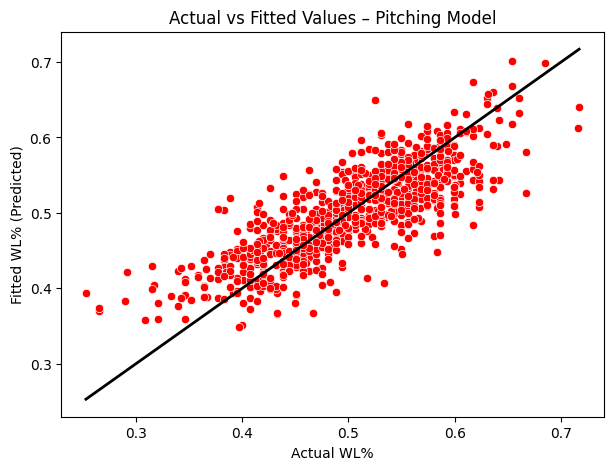

In [ ]:
# Our actual v predicted plot for pitching model, method found from StackOverflow https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python?utm_source=chatgpt.com
fitted_pitch = model_pitching4.fittedvalues

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pitching, y=fitted_pitch, color = 'red')
plt.xlabel("Actual WL%")
plt.ylabel("Fitted WL% (Predicted)")
plt.title("Actual vs Fitted Values – Pitching Model")
plt.plot([y_pitching.min(), y_pitching.max()],
         [y_pitching.min(), y_pitching.max()],
         color='black', linewidth=2)
plt.show()


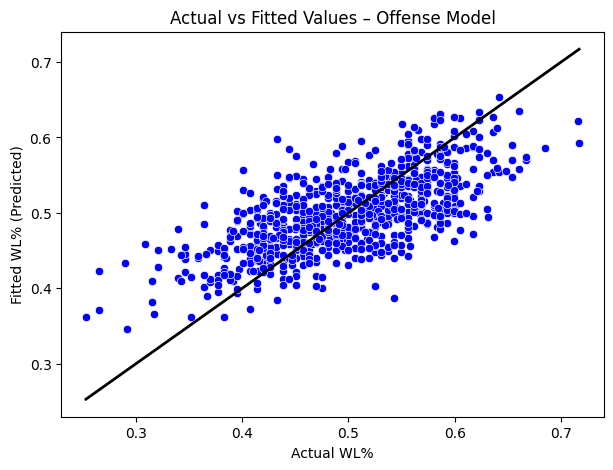

In [45]:
# Our actual v predicted plot for offense model
fitted_hit = model_offense.fittedvalues

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_offense, y=fitted_hit, color = 'blue')
plt.xlabel("Actual WL%")
plt.ylabel("Fitted WL% (Predicted)")
plt.title("Actual vs Fitted Values – Offense Model")
plt.plot([y_offense.min(), y_offense.max()],
         [y_offense.min(), y_offense.max()],
         color='black', linewidth=2)
plt.show()

# Adding in World Series winners for each year
Looking to see how well the base model did at predicting world series winners. 

In [46]:
#Adding World Series winners from 2000-2024 to a data frame for reference as a list
world_series_winners = ['NYY', 'ARZ', 'LAA', 'FLA', 'BOS', 'CHW', 'STL', 'BOS', 'PHI', 'NYY', 'SFG', 'STL', 'SFG', 'BOS', 'SFG', 'KC', 'CHC', 'HOU', 'BOS', 'WSH', 'LAD', 'ATL', 'HOU', 'TEX', 'LAD', 'LAD']
years = list(range(2000, 2000 + len(world_series_winners)))
ws_df = pd.DataFrame({'Season_df': years, 'Winner': world_series_winners})
print(ws_df)

    Season_df Winner
0        2000    NYY
1        2001    ARZ
2        2002    LAA
3        2003    FLA
4        2004    BOS
5        2005    CHW
6        2006    STL
7        2007    BOS
8        2008    PHI
9        2009    NYY
10       2010    SFG
11       2011    STL
12       2012    SFG
13       2013    BOS
14       2014    SFG
15       2015     KC
16       2016    CHC
17       2017    HOU
18       2018    BOS
19       2019    WSH
20       2020    LAD
21       2021    ATL
22       2022    HOU
23       2023    TEX
24       2024    LAD
25       2025    LAD


In [47]:
#Merging World Series winners with our main data frame for reference
merged2 = merged.merge(ws_df, on="Season_df", how="left")
merged2.head(20)

,Rk,Season_df,Team_df,Lg_df,GP_df,W_df,L_df,WL%_df,Bat#,PA,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/BB,Winner
0,1,2025,LAA,AL,162,72,90,0.444,31,6000,...,6255,88,4.78,1.432,9.0,1.4,3.9,8.0,2.06,LAD
1,2,2025,ARI,NL,162,80,82,0.494,36,6210,...,6183,97,4.27,1.318,8.7,1.2,3.1,8.0,2.58,LAD
2,3,2025,ATL,NL,162,76,86,0.469,27,6186,...,6116,96,4.20,1.306,8.4,1.2,3.3,8.9,2.67,LAD
3,4,2025,BAL,AL,162,75,87,0.463,44,6020,...,6166,88,4.41,1.365,9.0,1.4,3.3,8.5,2.58,LAD
4,5,2025,BOS,AL,162,89,73,0.549,26,6206,...,6150,111,3.98,1.286,8.3,1.0,3.3,8.5,2.57,LAD
5,6,2025,CHC,NL,162,92,70,0.568,22,6162,...,5904,102,4.16,1.177,8.1,1.3,2.5,7.9,3.12,LAD
6,7,2025,CHW,AL,162,60,102,0.370,36,5987,...,6124,98,4.47,1.364,8.5,1.2,3.8,8.2,2.16,LAD
7,8,2025,CIN,NL,162,83,79,0.512,26,6082,...,6035,119,4.11,1.222,7.9,1.2,3.1,8.7,2.79,LAD
8,9,2025,CLE,AL,162,88,74,0.543,24,5943,...,6054,114,3.95,1.260,8.1,1.1,3.3,8.6,2.62,LAD
9,10,2025,COL,NL,162,43,119,0.265,36,5908,...,6367,82,5.24,1.582,10.7,1.6,3.5,7.0,1.97,LAD


In [48]:
#Cleaning up our World Series merged data frame by adding a binary column for whether the team won the World Series that year and removing the extra column.
merged2['WS_Champion'] = (merged2['Team_df'] == merged2['Winner']).astype(int)
merged2.drop(columns=['Winner'], inplace=True)
merged2.head(20)

,Rk,Season_df,Team_df,Lg_df,GP_df,W_df,L_df,WL%_df,Bat#,PA,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/BB,WS_Champion
0,1,2025,LAA,AL,162,72,90,0.444,31,6000,...,6255,88,4.78,1.432,9.0,1.4,3.9,8.0,2.06,0
1,2,2025,ARI,NL,162,80,82,0.494,36,6210,...,6183,97,4.27,1.318,8.7,1.2,3.1,8.0,2.58,0
2,3,2025,ATL,NL,162,76,86,0.469,27,6186,...,6116,96,4.20,1.306,8.4,1.2,3.3,8.9,2.67,0
3,4,2025,BAL,AL,162,75,87,0.463,44,6020,...,6166,88,4.41,1.365,9.0,1.4,3.3,8.5,2.58,0
4,5,2025,BOS,AL,162,89,73,0.549,26,6206,...,6150,111,3.98,1.286,8.3,1.0,3.3,8.5,2.57,0
5,6,2025,CHC,NL,162,92,70,0.568,22,6162,...,5904,102,4.16,1.177,8.1,1.3,2.5,7.9,3.12,0
6,7,2025,CHW,AL,162,60,102,0.370,36,5987,...,6124,98,4.47,1.364,8.5,1.2,3.8,8.2,2.16,0
7,8,2025,CIN,NL,162,83,79,0.512,26,6082,...,6035,119,4.11,1.222,7.9,1.2,3.1,8.7,2.79,0
8,9,2025,CLE,AL,162,88,74,0.543,24,5943,...,6054,114,3.95,1.260,8.1,1.1,3.3,8.6,2.62,0
9,10,2025,COL,NL,162,43,119,0.265,36,5908,...,6367,82,5.24,1.582,10.7,1.6,3.5,7.0,1.97,0


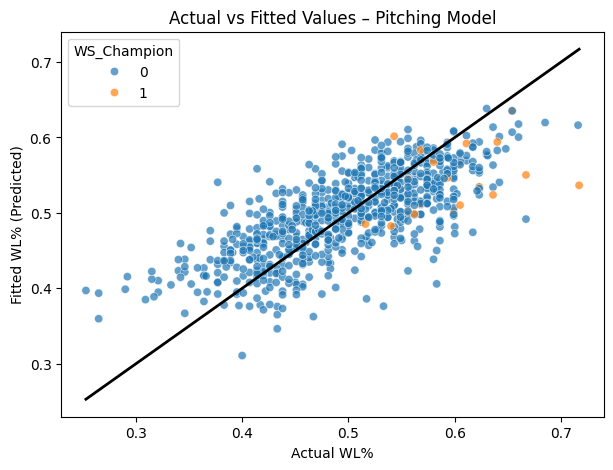

In [66]:
# Our actual v predicted plot for pitching model with World Series winners highlighted
fitted_pitch = model_pitching5.fittedvalues
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pitching, y=fitted_pitch, color = 'red', hue=merged2['WS_Champion'], alpha=0.7)
plt.xlabel("Actual WL%")
plt.ylabel("Fitted WL% (Predicted)")
plt.title("Actual vs Fitted Values – Pitching Model")
plt.plot([y_pitching.min(), y_pitching.max()],
         [y_pitching.min(), y_pitching.max()],
         color='black', linewidth=2)
plt.show()

In [ ]:
#Our pitching mean residuals by World Series champions vs non-champions. Method to get mean residuals from Code Academy https://www.codecademy.com/resources/docs/python/statsmodels/model-residuals?utm_source=chatgpt.com
residuals_p = y_pitching - fitted_pitch
merged2['Residuals'] = residuals_p
mean_resid = merged2.groupby('WS_Champion')['Residuals'].mean()
abs_mean_resid = merged2.groupby('WS_Champion')['Residuals'].apply(lambda x: np.mean(np.abs(x)))
print("Mean Residual (signed):")
print(mean_resid)
print("\nMean Absolute Residual (distance):")
print(abs_mean_resid)


Mean Residual (signed):
WS_Champion
0   -0.001475
1    0.050830
Name: Residuals, dtype: float64

Mean Absolute Residual (distance):
WS_Champion
0    0.039635
1    0.057563
Name: Residuals, dtype: float64


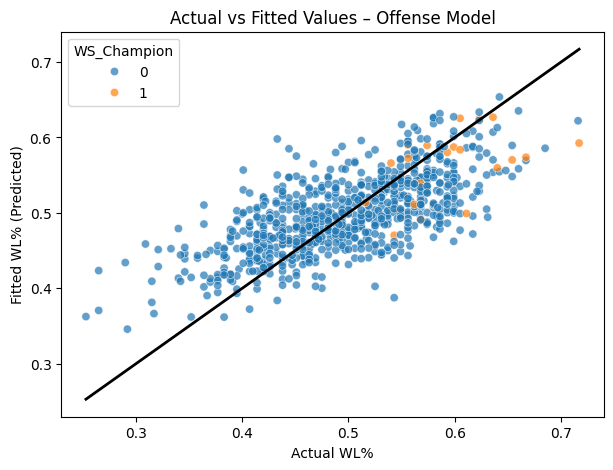

In [51]:
#Offense actual v predicted plot with World Series winners highlighted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_offense, y=fitted_hit, color = 'blue', hue=merged2['WS_Champion'], alpha=0.7)
plt.xlabel("Actual WL%")
plt.ylabel("Fitted WL% (Predicted)")
plt.title("Actual vs Fitted Values – Offense Model")
plt.plot([y_offense.min(), y_offense.max()],
         [y_offense.min(), y_offense.max()],
         color='black', linewidth=2)
plt.show()

In [68]:
#Our offense mean residuals by World Series champions vs non-champions
residuals_o = y_offense - fitted_hit
merged2['Residuals'] = residuals_o
mean_resid = merged2.groupby('WS_Champion')['Residuals'].mean()
abs_mean_resid = merged2.groupby('WS_Champion')['Residuals'].apply(lambda x: np.mean(np.abs(x)))
print("Mean Residual (signed):")
print(mean_resid)
print("\nMean Absolute Residual (distance):")
print(abs_mean_resid)


Mean Residual (signed):
WS_Champion
0   -0.001023
1    0.035245
Name: Residuals, dtype: float64

Mean Absolute Residual (distance):
WS_Champion
0    0.043232
1    0.045612
Name: Residuals, dtype: float64


# References
Below is a compiled list of references I have used to build this project

“Detecting Multicollinearity with VIF - Python.” GeeksforGeeks, GeeksforGeeks, 20 Nov. 2025, www.geeksforgeeks.org/python/detecting-multicollinearity-with-vif-python/. 
goldisfine4, et al. “How to Overplot a Line on a Scatter Plot in Python?” Stack Overflow, https://stackoverflow.com/#organization, 14 May 2019, stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python?utm. 
“Ordinary Least Squares (OLS) Using Statsmodels.” GeeksforGeeks, GeeksforGeeks, 15 July 2025, www.geeksforgeeks.org/data-science/ordinary-least-squares-ols-using-statsmodels/. 
“Python: Statsmodels: Model Residuals.” Codecademy, Codecademy, 15 Jan. 2025, www.codecademy.com/resources/docs/python/statsmodels/model-residuals?utm. 
“Seaborn.Heatmap#.” Seaborn.Heatmap - Seaborn 0.13.2 Documentation, seaborn.pydata.org/generated/seaborn.heatmap.html. Accessed 9 Dec. 2025. 
“Your All-Access Ticket to the Sports Reference Database.” Stathead, stathead.com/stathead/. Accessed 9 Dec. 2025. 
